In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("metrics.csv")
df.sample(5)

,run_name,arc_features,arc_skip,arc_num_conv,arc_latent_volume,arc_num_params,arc_encoder_blocks,swaps,train_loss,valid_loss,test_loss,valid_F1,train_F1,test_F1,train_Accuracy,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq
123,n4-3-n8-0-skip0-0.34375,"[4, 4, 4, 4]",0,2,64.0,860,3,0.34375,NaN,NaN,0.151751,NaN,NaN,0.292099,NaN,NaN,0.292099,NaN,NaN,0.0
26,n4-3-n8-1-skip1-0.1875,"[4, 4, 4, 4, 8]",1,2,64.0,1556,4,0.18750,NaN,NaN,0.092145,NaN,NaN,0.743161,NaN,NaN,0.743161,NaN,NaN,0.0
62,n4-3-n8-1-skip0-0.125,"[4, 4, 4, 4, 8]",0,2,64.0,1364,4,0.12500,NaN,NaN,0.152312,NaN,NaN,0.282842,NaN,NaN,0.282842,NaN,NaN,0.0
421,n4-0-n8-1-skip1-0.59375,"[4, 8]",1,2,512.0,692,1,0.59375,NaN,NaN,0.173869,NaN,NaN,0.555455,NaN,NaN,0.555455,NaN,NaN,0.0
295,n4-1-n8-1-skip1-0.28125,"[4, 4, 8]",1,2,256.0,980,2,0.28125,NaN,NaN,0.096975,NaN,NaN,0.744834,NaN,NaN,0.744834,NaN,NaN,0.0


In [6]:
df[['arc_features',	'arc_skip',	'arc_num_conv',	'arc_latent_volume',	'arc_encoder_blocks']].value_counts()

arc_features     arc_skip  arc_num_conv  arc_latent_volume  arc_encoder_blocks
[4, 4, 4, 4, 8]  0         2             64.0               4                     34
                 1         2             64.0               4                     34
[4, 4, 4, 4]     0         2             64.0               3                     34
                 1         2             64.0               3                     34
[4, 4, 4, 8]     0         2             128.0              3                     34
                 1         2             128.0              3                     34
[4, 4, 4]        0         2             128.0              2                     34
                 1         2             128.0              2                     34
[4, 4, 8]        0         2             256.0              2                     34
                 1         2             256.0              2                     34
[4, 4]           0         2             256.0              1          

In [10]:
import plotly.express as px
import pandas as pd 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

hue = "arc_features"
yplot = "test_Accuracy"
xplot = "swaps"
extra_info = ["arc_num_conv", "arc_encoder_blocks", "arc_latent_volume"]


df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

fig0 = px.scatter(df0, x=xplot, y=yplot, color=hue, title="No skip", hover_data=extra_info, labels={"test Acc", "# Swaps"})
fig1 = px.scatter(df1, x=xplot, y=yplot, color=hue, title="Skip", hover_data=extra_info, labels={"test Acc", "# Swaps"})

fig0.update_layout(showlegend=False)  # Oculta la leyenda en el primer gráfico
fig = make_subplots(rows=1, cols=2, subplot_titles=["arc_skip == 0", "arc_skip == 1"], shared_yaxes=True)

for trace in fig0.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(width=1600, height=800, legend_title="canales", showlegend=True,
                  xaxis={'title':{'text':"# Swaps"}},
                  yaxis={'title':{'text':"Test Accuracy"}},
                  )

fig.show()

In [12]:
import plotly.express as px
import pandas as pd

hue = "swaps"
yplot = "test_Accuracy"
xplot = "arc_features"

extra_info = ["arc_features", "arc_num_conv",  "arc_latent_volume", "arc_encoder_blocks"]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

fig0 = px.scatter(
    df0, x=xplot, y=yplot, color=hue, title="No skip", hover_data=extra_info)

fig1 = px.scatter(df1, x=xplot, y=yplot, color=hue, title="Skip", hover_data=extra_info)

fig0.update_layout(showlegend=False)  # Oculta la leyenda en el primer gráfico

# Combinar ambos gráficos en subplots
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=["arc_skip == 0", "arc_skip == 1"], shared_yaxes=True)

for trace in fig0.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(width=900, height=500, legend_title="Num swaps", showlegend=True,
                  xaxis={'title':{'text':"Canales"}},
                  yaxis={'title':{'text':"Test Accuracy"}},)

fig.show()

In [19]:
import plotly.express as px
import pandas as pd

hue = "swaps"
yplot = "test_Accuracy"
xplot = "arc_encoder_blocks"

extra_info = ["arc_features", "arc_num_conv",  "arc_latent_volume", "arc_encoder_blocks"]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

fig0 = px.scatter(
    df0, x=xplot, y=yplot, color=hue, title="No skip", hover_data=extra_info)

fig1 = px.scatter(df1, x=xplot, y=yplot, color=hue, title="Skip", hover_data=extra_info)

fig0.update_layout(showlegend=False)  # Oculta la leyenda en el primer gráfico

# Combinar ambos gráficos en subplots
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=["arc_skip == 0", "arc_skip == 1"], shared_yaxes=True)

for trace in fig0.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(width=900, height=500, legend_title="Num swaps", showlegend=True,
                  xaxis={'title':{'text':"Canales"}},
                  yaxis={'title':{'text':"Test Accuracy"}},)

fig.show()

In [13]:
import plotly.express as px
import pandas as pd

hue = "swaps"
yplot = "test_Accuracy"
xplot = "arc_latent_volume"

extra_info = ["arc_features", "arc_num_conv",  "arc_features", "arc_encoder_blocks"]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

fig0 = px.scatter(
    df0, x=xplot, y=yplot, color=hue, title="No skip", hover_data=extra_info)

fig1 = px.scatter(df1, x=xplot, y=yplot, color=hue, title="Skip", hover_data=extra_info)

fig0.update_layout(showlegend=False)  # Oculta la leyenda en el primer gráfico

# Combinar ambos gráficos en subplots
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=["arc_skip == 0", "arc_skip == 1"], shared_yaxes=True)

for trace in fig0.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(width=900, height=500, legend_title="Num swaps", showlegend=True,
                  xaxis={'title':{'text':"Canales"}},
                  yaxis={'title':{'text':"Test Accuracy"}},)

fig.show()

In [15]:
import plotly.express as px
import pandas as pd

hue = "arc_latent_volume"
yplot = "test_Accuracy"
xplot = "swaps"

# extra_info = ["test_file", "arc_features", "train_Accuracy", "valid_Accuracy"]

df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

fig0 = px.scatter(
    df0, x=xplot, y=yplot, color=hue, title="No skip" 
)
fig1 = px.scatter(df1, x=xplot, y=yplot, color=hue, title="Skip")

fig0.update_layout(showlegend=False)  # Oculta la leyenda en el primer gráfico

# Combinar ambos gráficos en subplots
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=["arc_skip == 0", "arc_skip == 1"])

for trace in fig0.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(width=900, height=500, legend_title="Num Params", showlegend=True)

fig.show()

In [24]:
import plotly.express as px
import pandas as pd 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

hue = "arc_latent_volume"
yplot = "test_Accuracy"
xplot = "swaps"
extra_info = ["arc_num_conv", "arc_encoder_blocks", "arc_features"]


df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

fig0 = px.scatter(df0, x=xplot, y=yplot, color=hue, title="No skip", hover_data=extra_info, labels={"test Acc", "# Swaps"})
fig1 = px.scatter(df1, x=xplot, y=yplot, color=hue, title="Skip", hover_data=extra_info, labels={"test Acc", "# Swaps"})

fig0.update_layout(showlegend=False)  # Oculta la leyenda en el primer gráfico
fig = make_subplots(rows=1, cols=2, subplot_titles=["arc_skip == 0", "arc_skip == 1"], shared_yaxes=True)

for trace in fig0.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(width=1200, height=600, legend_title="canales", showlegend=True,
                  xaxis={'title':{'text':"P Swaps"}},
                  yaxis={'title':{'text':"Test Accuracy"}},
                  )

fig.show()

In [20]:
import plotly.express as px
import pandas as pd 
from plotly.subplots import make_subplots
import plotly.graph_objects as go

hue = "swaps"
yplot = "test_Accuracy"
xplot = "arc_num_params"
extra_info = ["arc_num_conv", "arc_encoder_blocks", "arc_features"]


df0 = df.query("arc_skip == 0")
df1 = df.query("arc_skip == 1")

fig0 = px.scatter(df0, x=xplot, y=yplot, color=hue, title="No skip", hover_data=extra_info, labels={"test Acc", "# Swaps"})
fig1 = px.scatter(df1, x=xplot, y=yplot, color=hue, title="Skip", hover_data=extra_info, labels={"test Acc", "# Swaps"})

fig0.update_layout(showlegend=False)  # Oculta la leyenda en el primer gráfico
fig = make_subplots(rows=1, cols=2, subplot_titles=["arc_skip == 0", "arc_skip == 1"], shared_yaxes=True)

for trace in fig0.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig1.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(width=1600, height=800, legend_title="canales", showlegend=True,
                  xaxis={'title':{'text':"# Swaps"}},
                  yaxis={'title':{'text':"Test Accuracy"}},
                  )

fig.show()

In [ ]:
df.columns

Index(['run_name', 'arc_features', 'arc_skip', 'arc_num_conv',
       'arc_latent_volume', 'arc_encoder_blocks', 'n_swaps', 'train_loss',
       'valid_loss', 'test_loss', 'valid_F1', 'train_F1', 'test_F1',
       'train_Accuracy', 'valid_Accuracy', 'test_Accuracy',
       'train_Accuracy_seq', 'valid_Accuracy_seq', 'test_Accuracy_seq'],
      dtype='object')

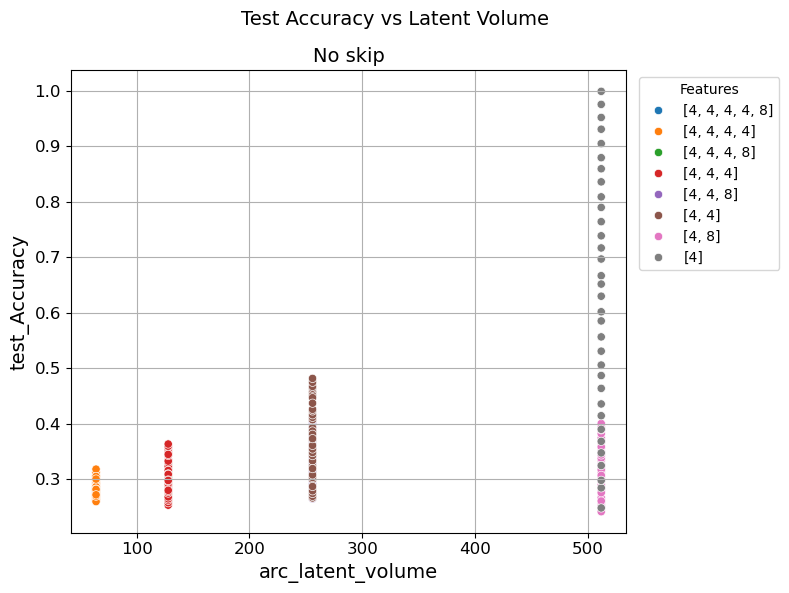

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

hue = "arc_features"
xplot = "arc_latent_volume"
yplot = "test_Accuracy"
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

sns.scatterplot(data=df0.sort_values(by=hue), x=xplot, y=yplot, hue=hue, ax=ax)

ax.grid()
ax.set_xlabel(ax.get_xlabel(), fontsize=14)
ax.set_ylabel(ax.get_ylabel(), fontsize=14)
ax.tick_params(axis="both", which="major", labelsize=12)

fig.suptitle("Test Accuracy vs Latent Volume", fontsize=14)
ax.set_title("No skip", fontsize=14)
ax.legend(
    title="Features",
    bbox_to_anchor=(1.01, 1),
)
fig.tight_layout()
plt.show()

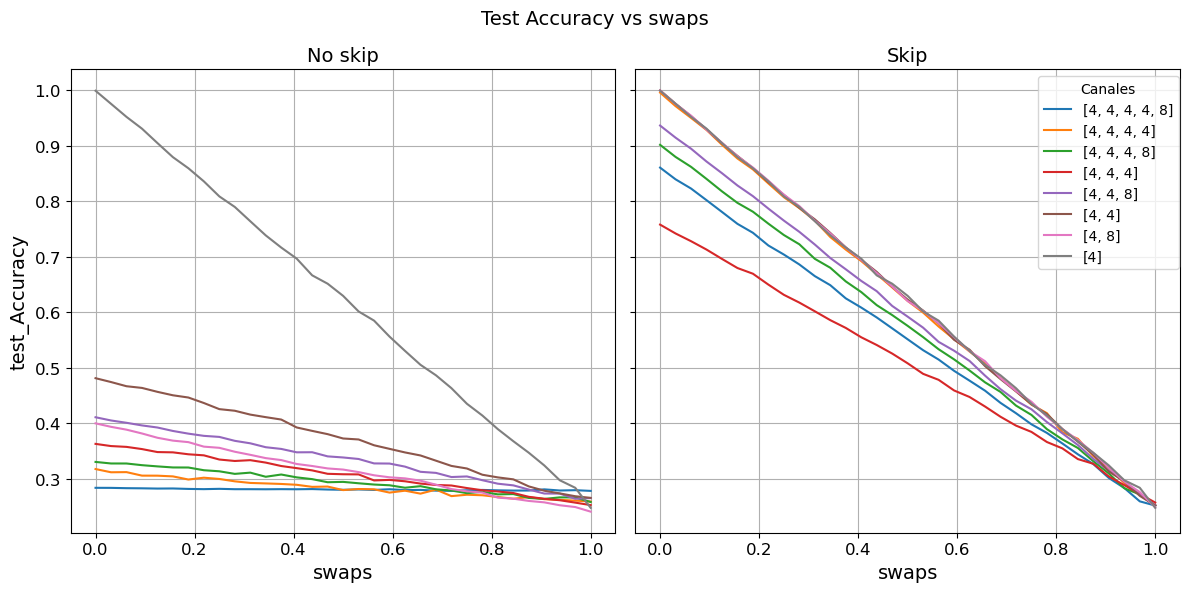

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

hue = "arc_features"
xplot = "swaps"
yplot = "test_Accuracy"
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.lineplot(data=df0.sort_values(by=hue), x=xplot, y=yplot, hue=hue, ax=ax[0], legend=None)

ax[0].grid()
ax[0].set_xlabel(ax[0].get_xlabel(), fontsize=14)
ax[0].set_ylabel(ax[0].get_ylabel(), fontsize=14)
ax[0].tick_params(axis="both", which="major", labelsize=12)

fig.suptitle("Test Accuracy vs num_params", fontsize=14)
ax[0].set_title("No skip", fontsize=14) 

sns.lineplot(data=df1.sort_values(by=hue), x=xplot, y=yplot, hue=hue, ax=ax[1])

ax[1].grid()
ax[1].set_xlabel(ax[1].get_xlabel(), fontsize=14)
ax[1].set_ylabel(ax[1].get_ylabel(), fontsize=14)
ax[1].tick_params(axis="both", which="major", labelsize=12)
# ax[1].set_yscale('log')
fig.suptitle("Test Accuracy vs swaps", fontsize=14)
ax[1].set_title("Skip", fontsize=14)
ax[1].legend(
    title="Canales",
    bbox_to_anchor=(1.01, 1),
)
fig.tight_layout()
plt.show()

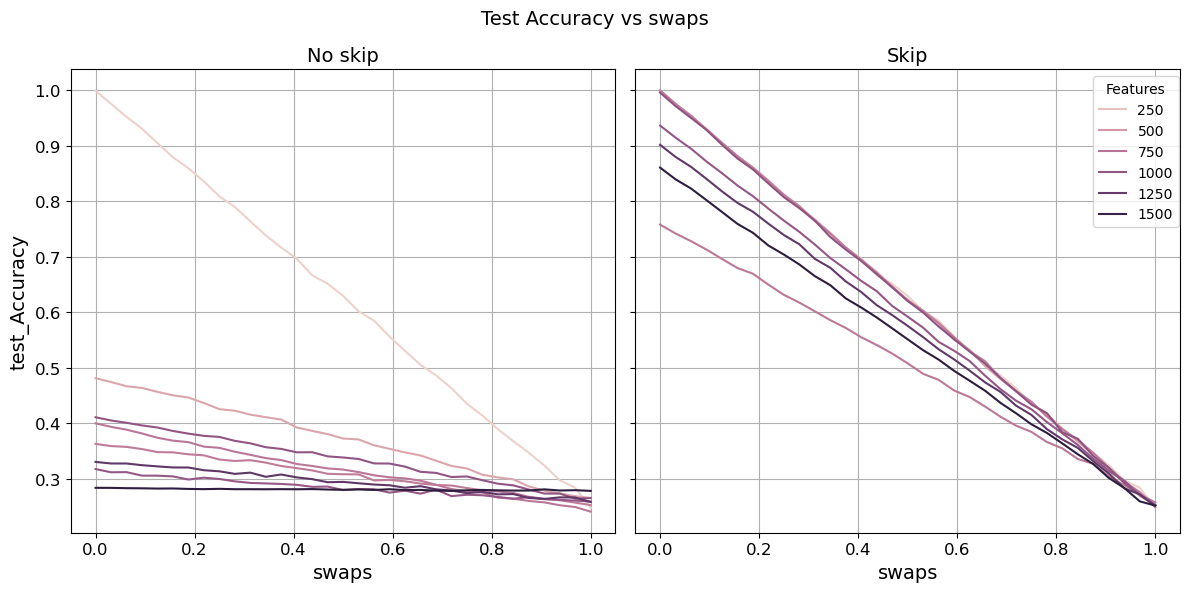

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

hue = "arc_num_params"
xplot = "swaps"
yplot = "test_Accuracy"
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.lineplot(data=df0.sort_values(by=hue), x=xplot, y=yplot, hue=hue, ax=ax[0], legend=None)

ax[0].grid()
ax[0].set_xlabel(ax[0].get_xlabel(), fontsize=14)
ax[0].set_ylabel(ax[0].get_ylabel(), fontsize=14)
ax[0].tick_params(axis="both", which="major", labelsize=12)

fig.suptitle("Test Accuracy vs num_params", fontsize=14)
ax[0].set_title("No skip", fontsize=14) 

sns.lineplot(data=df1.sort_values(by=hue), x=xplot, y=yplot, hue=hue, ax=ax[1])

ax[1].grid()
ax[1].set_xlabel(ax[1].get_xlabel(), fontsize=14)
ax[1].set_ylabel(ax[1].get_ylabel(), fontsize=14)
ax[1].tick_params(axis="both", which="major", labelsize=12)
# ax[1].set_yscale('log')
fig.suptitle("Test Accuracy vs swaps", fontsize=14)
ax[1].set_title("Skip", fontsize=14)
ax[1].legend(
    title="Features",
    bbox_to_anchor=(1.01, 1),
)
fig.tight_layout()
plt.show()

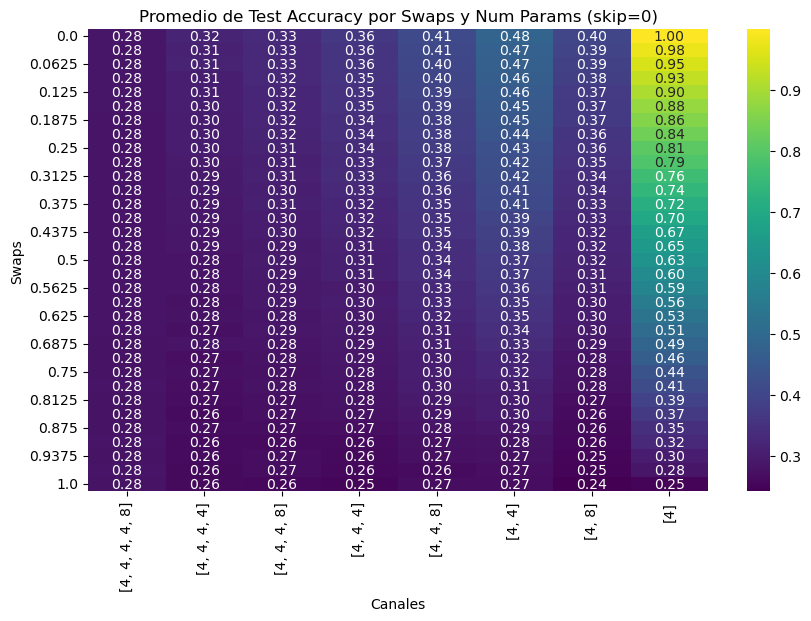

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Creamos una tabla pivote para a los valores promedio de test_Accuracy
pivot_table = df.query('arc_skip == 0').pivot_table(
    values='test_Accuracy',
    index='swaps',
    columns='arc_features',
    aggfunc='mean'
)

# Dibujamos el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="viridis")
plt.title('Promedio de Test Accuracy por Swaps y Num Params (skip=0)')
plt.ylabel('Swaps')
plt.xlabel('Canales')
plt.show()


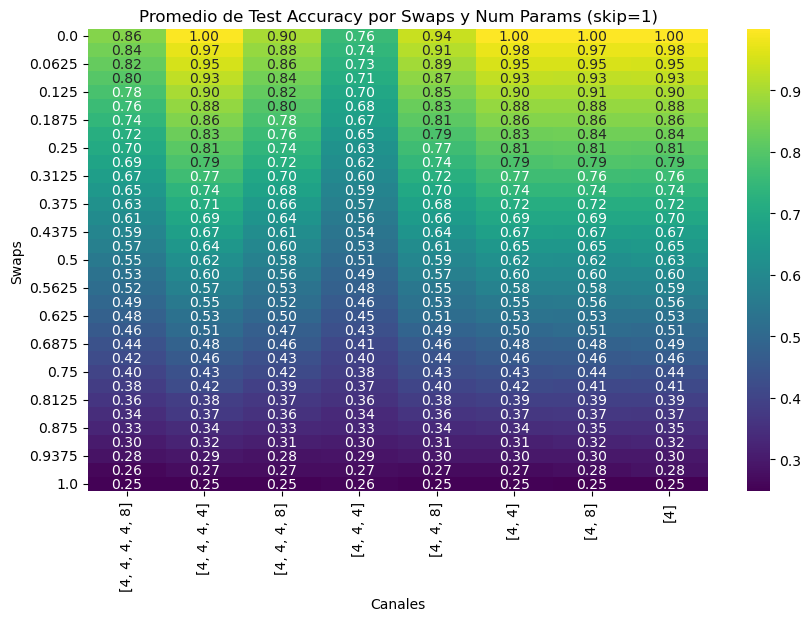

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Creamos una tabla pivote para a los valores promedio de test_Accuracy
pivot_table = df.query('arc_skip == 1').pivot_table(
    values='test_Accuracy',
    index='swaps', 
    columns='arc_features',
    aggfunc='mean'
)

# Dibujamos el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="viridis")
plt.title('Promedio de Test Accuracy por Swaps y Num Params (skip=1)')
plt.ylabel('Swaps')
plt.xlabel('Canales')
plt.show()
